In [51]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os
from astropy.wcs import WCS
from reproject import reproject_interp, reproject_exact
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic

In [52]:
PATH = 'D:/Hi-GalTiles/FitsFiles/l222'
print(os.listdir(PATH))

['l222_cdens.fits', 'l222_PACS_160.fits', 'l222_PACS_70.fits', 'l222_SPIRE_250.fits', 'l222_SPIRE_350.fits', 'l222_SPIRE_500.fits', 'l222_temp.fits']


In [53]:
file_no = 5

fits1 = fits.open(os.path.join(PATH,os.listdir(PATH)[0]))
fits2 = fits.open(os.path.join(PATH,os.listdir(PATH)[file_no]))

print(os.listdir(PATH)[file_no])

fits1.info()
fits2.info()

l222_SPIRE_500.fits
Filename: D:/Hi-GalTiles/FitsFiles/l222\l222_cdens.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   (1440, 1440)   float32   
Filename: D:/Hi-GalTiles/FitsFiles/l222\l222_SPIRE_500.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     167   ()      
  1  image         1 ImageHDU        47   (867, 825)   float64   
  2  error         1 ImageHDU        47   (867, 825)   float64   
  3  coverage      1 ImageHDU        47   (867, 825)   float64   
  4  History       1 ImageHDU        23   ()      
  5  HistoryScript    1 BinTableHDU     39   83R x 1C   [326A]   
  6  HistoryTasks    1 BinTableHDU     46   61R x 4C   [1K, 27A, 1K, 9A]   
  7  HistoryParameters    1 BinTableHDU     74   334R x 10C   [1K, 20A, 13A, 211A, 1L, 1K, 1L, 74A, 11A, 41A]   


In [54]:
hdu1 = fits1[0]
hdu2 = fits2[1]

'''print(repr(hdu2.header['CDELT2']))
pix_resolution_deg_sqr = hdu2.header['CDELT2']**2
print(pix_resolution_deg_sqr)
pix_resolution_sr = pix_resolution_deg_sqr/((180/np.pi)**2)
print(pix_resolution_sr)

new_data = hdu2.data/(pix_resolution_sr*1e6)
hdu2.data = new_data'''

wcs1 = WCS(hdu1.header)
newheader = wcs1.to_header()
newheader['NAXIS'] = hdu1.header['NAXIS']
newheader['NAXIS1'] = hdu1.header['NAXIS1']
newheader['NAXIS2'] = hdu1.header['NAXIS2']
newheader['BUNIT'] = hdu2.header['BUNIT']
#newheader['BUNIT'] = 'MJy/sr'
print(repr(newheader))

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                723.0 / Pixel coordinate of reference point            
CRPIX2  =                723.0 / Pixel coordinate of reference point            
CDELT1  =            -0.001667 / [deg] Coordinate increment at reference point  
CDELT2  =             0.001667 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'GLON-CAR'           / galactic longitude, plate caree projection     
CTYPE2  = 'GLAT-CAR'           / galactic latitude, plate caree projection      
CRVAL1  =          -137.829987 / [deg] Coordinate value at reference point      
CRVAL2  =            -0.933663 / [deg] Coordinate value at reference point      
LONPOLE =                180.0 / [deg] Native longitude of celestial pole       
LATPOLE =            89.0663

In [55]:
array, footprint = reproject_exact(hdu2, newheader)

In [56]:
print(array)

[[        nan         nan         nan ... 16.9882862  16.98175714
  16.96674406]
 [        nan         nan         nan ... 17.04490043 17.00051638
  16.90287788]
 [        nan         nan         nan ... 17.068308   17.13227993
  17.32330594]
 ...
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]]


Text(0.5,1,'l222_SPIRE_500.fits')

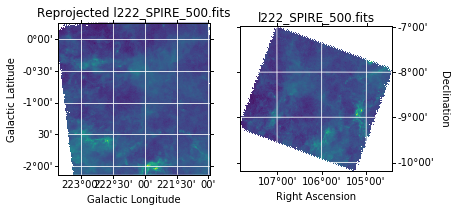

In [57]:
ax1 = plt.subplot(1,2,1,projection=WCS(newheader))
ax1.imshow(np.log10(array), origin='lower')
ax1.coords.grid(color='white')
ax1.coords['glon'].set_axislabel('Galactic Longitude')
ax1.coords['glat'].set_axislabel('Galactic Latitude')
ax1.set_title('Reprojected {}'.format(os.listdir(PATH)[file_no]))

ax2 = plt.subplot(1,2,2, projection=WCS(hdu2.header))
ax2.imshow(np.log10(hdu2.data), origin='lower')
ax2.coords.grid(color='white')
ax2.coords['ra'].set_axislabel('Right Ascension')
ax2.coords['dec'].set_axislabel('Declination')
ax2.coords['dec'].set_axislabel_position('r')
ax2.coords['dec'].set_ticklabel_position('r')
ax2.set_title(os.listdir(PATH)[file_no])

In [58]:
fits.writeto('D:/Hi-GalTiles/FitsFiles/Reprojected_l222/Reprojected_{}'.format(os.listdir(PATH)[file_no]), array, newheader, overwrite=True)